<a href="https://colab.research.google.com/github/satuelisa/CINVESTAV2025/blob/main/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Python for biomedical scientists

## Session 1: Data

In all programming, the first step is to get your data into the code. The simplest (and worst) idea is to type it into individual *variables*.

In [120]:
a = 12 # a variable called "a"
b = 2094.2 # a second variable called "b"
print(a * b) # print out the product of "a" multiplying "b"

25130.399999999998


Your data tends to already reside in a file. If you're clever and have a healthy level of suspicion towards commercial software, your data is in comma-separated plaintext files like [this example](https://raw.githubusercontent.com/satuelisa/CINVESTAV2025/refs/heads/main/data.csv).

Let's **create** one like that so that we can control how much data we have.

In [121]:
# upper and lower values between which we want our artificial data to sit
lowestReadout = -123.5 # this value can be decimal
highestReadout = 222.3 # this one just need to be larger than the one directly above

How would we ENSURE that the highest is actually higher than the lowest?

There are two options: check and fix or just pull the breaks.

In [122]:
# option 1: check and fix

if lowestReadout > highestReadout: # if the value for the lower is actually higher :(
  lowestReadout, highestReadout = highestReadout, lowestReadout # swap the values
else:
  print('Thank you for being mindful :)')

if lowestReadout == highestReadout: # if they're equal and we want them to be different
  highestReadout += 1.5 # increment the higher one for a bit fixes this

# option 2: hard stop (this will never happen if the above fix is in place)
assert lowestReadout < highestReadout # the program refuses to continue if this condition is not met

Thank you for being mindful :)


In [123]:
# we load from the library "random" a specific subroutine called "uniform" that can be used to generat euniform pseudorandom data
from random import uniform

# a couple of parameters to control how much data we generate
howManySamples = 12 # this is a count so it is an integer
howManyTimeSteps = 30 # this is also a count

# we are now all set to start generating data for each sample at each time step
with open('data.csv', 'w') as targetFile: # tell Python create a file for writing into
  print('ID,time,value', file = targetFile) # print out a header on the first line of the file
  for sample in range(howManySamples): # iterate in a loop
    for timestep in range(howManyTimeSteps): # and inside that loop, iterate again in a second loop
      readout = uniform(lowestReadout, highestReadout) # generate a uniform pseudorandom value
      print(f'{sample},{timestep},{readout:.3f}', file = targetFile) # print out that data line
print('Done!')

Done!


Where did it go? Click on the folder icon on the sidebar on colab to see it.

OK, but what if we already *have* the data and want to **load** it into the Python code?

Just as we can write files, we can also read them. Let's first read files from the internet because Real Scientists put their data there anyhow. All we need is the URL of the file and a super useful library called `pandas` will handle the rest.

In [124]:
whereTheDataIs = 'https://raw.githubusercontent.com/satuelisa/CINVESTAV2025/refs/heads/main/data.csv'

import pandas as pd # everyone is too lazy to type "pandas" a lot so we can ask Python to just abbreviate it to "pd"

myData = pd.read_csv(whereTheDataIs)

print(myData.shape)

(360, 3)


It loaded but we cannot see it. This is intended since sometimes there are millions of lines of data. We can ask `pandas` to show us just the beginning of it.

In [125]:
myData.head()

,ID,time,value
0,0,0,-112.166
1,0,1,218.674
2,0,2,37.212
3,0,3,-89.602
4,0,4,-32.892


We could also ask to see the end of it, of course.

In [126]:
myData.tail()

,ID,time,value
355,11,25,22.574
356,11,26,-2.719
357,11,27,62.246
358,11,28,111.950
359,11,29,65.411


When loading in data, we might want to doublecheck some assumptions we have of it, such as how many sample IDs it contains, how long the observed time series are, and how the recorded values are distributed.

In [127]:
myData.ID.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [128]:
timeValues = myData.time.unique()
print(min(timeValues), max(timeValues), len(timeValues))

0 29 30


In [129]:
observations = myData.value
print(min(observations), max(observations), len(observations))

-123.353 221.782 360


Was every observation different? If so, why? How would one generate data with repeated observations?

## Exploration goals for Session 1

- Find out how to generate non-uniform data pseudorandomly by browsing the documentation for the [`random` library](https://docs.python.org/3/library/random.html).

- Find out how to read in Excel files by browsing and experimenting with the [`pandas` library](https://pandas.pydata.org/docs/).

- Find out how to host CSV, Excel and other files online (ideally with version control and author information) with a free tool such as [GitHub](https://github.com/).

Seek out an instructor to either brag about your discoveries or request guidance when nothing works as intended.

## Session 2: Visualization

It is often more intuitive to grasp what is happening in a dataset if ones *draws* it. Our example data contains time series (one per each of the samples that readouts were being taken from) and we also have the distributions of the observations that we can work with. If you were successful with your exploration at the end of Session 1, you will now be able to diversify the below to fully leverage that work.

Just in case you got nowhere, there is a block of code that creates more complex data below. You can skip executing it if you want to work with your own modifications made during Session 1.

In [130]:
sc = 5 # samplecount

# normally distributed data, each sample with its own uniformly generated mean that is initially between 1.5 and 2.3
means = [ uniform(1.5, 2.3) for sample in range(sc) ] # this is a list of values
sds = [ uniform(0.5, 0.7) for sample in range(sc) ] # similarly for the standard deviations

Let's take a moment to understand better what a *list* is in Python.

In [131]:
print(len(means))
print(means[2])
print(means[-1])
print(sum(means))
print(min(means))

5
2.2141261345400056
2.092352086065732
9.998599034280954
1.5312749466549935


In [132]:
tl = 40 # length of the time series

# make the means grow over time additively
# make the standard deviations grow over time, but multiplicatively
mi = 0.1
si = 1.1

# let's use empty lists to start accumulating data into
IDs = []
t = []
data = []

import numpy as np # for more cool math and stats

for timestep in range(tl): # time will iterate "on the outside" so we can make things evolve over time
  for sample in range(sc):
    IDs.append(sample)
    t.append(timestep)
    value = np.random.normal(means[sample], sds[sample])
    data.append(value)
  # value ranges evolve over time
  means = [ m + mi for m in means ]
  sds = [si * s for s in sds ]
  # note that this happens inside the time loop but outside the sample loop!

We need to put these lists inside a dataframe so that everything works as if it had come from a file. It is important to be consistent so that you can reuse your work often.

In [133]:
 stuff = { 'ID' : IDs, 'time' : t, 'value' : data } # this is a dictionary

Eh. Now we need to maybe understand a bit what a dictionary is.

In [134]:
thing = dict()
thing['key'] = 'value'
thing[1] = 2

print(thing)

thing[1] = 3

print(thing[1])
print(thing['key'])
print(thing.values())

{'key': 'value', 1: 2}
3
value
dict_values(['value', 3])


In [135]:
myData = pd.DataFrame(stuff)
myData.head()

,ID,time,value
0,0,0,2.764035
1,1,0,1.110851
2,2,0,1.588234
3,3,0,2.020673
4,4,0,2.537345


In [136]:
myData.shape

(200, 3)

Let's start with looking at the distribution of all the recorded values as a whole, differentiating neither by the time at which the measurement was made nor by the sample the readout corresponded to.

<Axes: xlabel='value', ylabel='Count'>

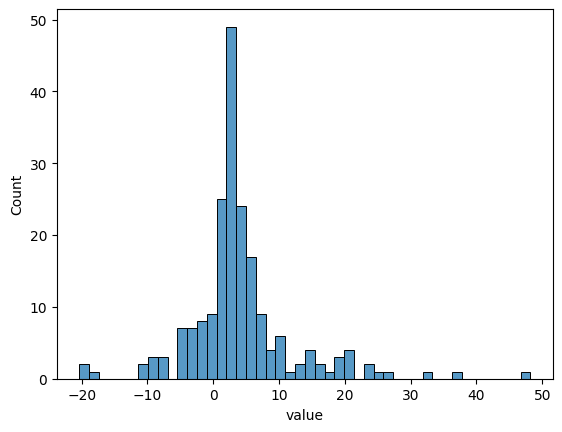

In [137]:
import seaborn as sns # one of many data visualization libraries

sns.histplot(myData, x = 'value')

If we want to smoothen this out to appreciate the general shape of the distribution for each sample, we can easily do that with a kernel density estimator (KDE).

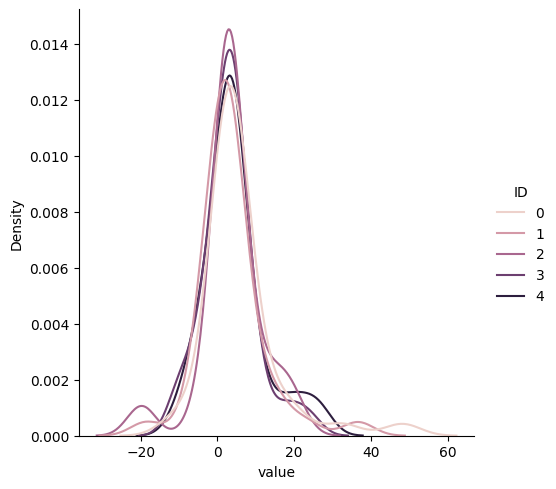

In [138]:
sns.displot(myData, x = 'value', hue = 'ID', kind = 'kde')

Judging by how the data was created, it should be slightly different for each of the individual samples.

Instead of plotting a bunch of individual histograms, let's make a violinplot.

<Axes: xlabel='ID', ylabel='value'>

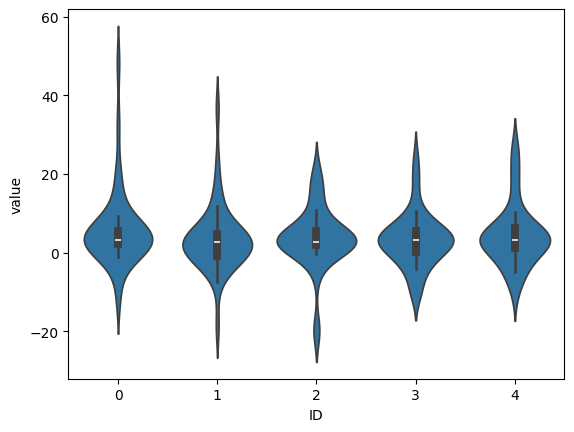

In [139]:
sns.violinplot(myData, x = 'ID', y = 'value')

To read this, tilt your head and imagine smoothened histograms. Or, just tilt the plot itself.

<Axes: xlabel='value', ylabel='ID'>

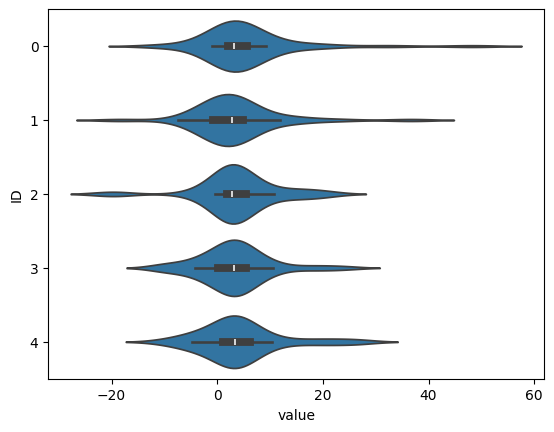

In [140]:
sns.violinplot(myData, y = 'ID', x = 'value', orient = 'h')

If you want to see each individual datapoint instead of the smoothed violins and candlesticks, you can. We can also make the color depend on the time so that we can see *when* things happen.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='value', ylabel='ID'>

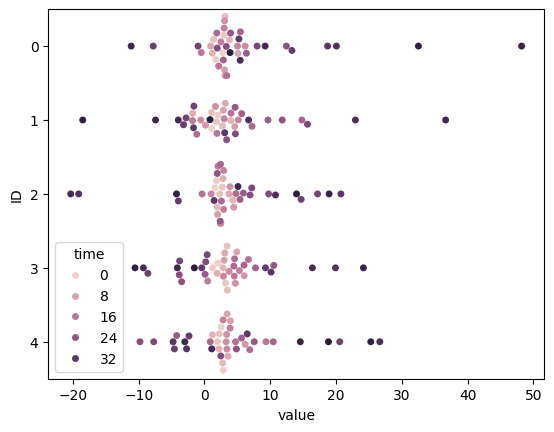

In [141]:
sns.swarmplot(myData, y = 'ID', x = 'value', orient = 'h', hue = 'time')

We can also plot the time series for each sample to see how the measured values evolve over time.

<Axes: xlabel='time', ylabel='value'>

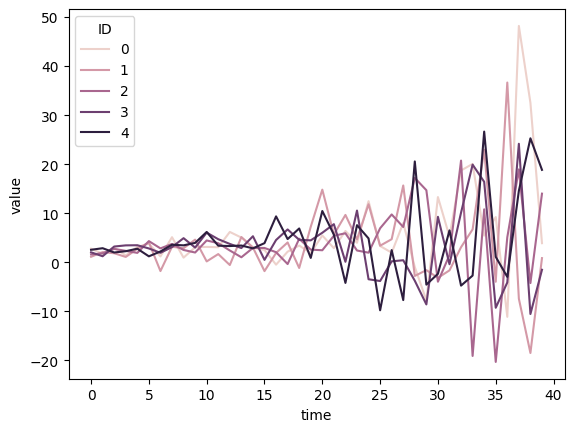

In [142]:
sns.lineplot(myData, x = 'time', y = 'value', hue = 'ID')

To explore how the columns interact, we can make a plot with multiple panels.

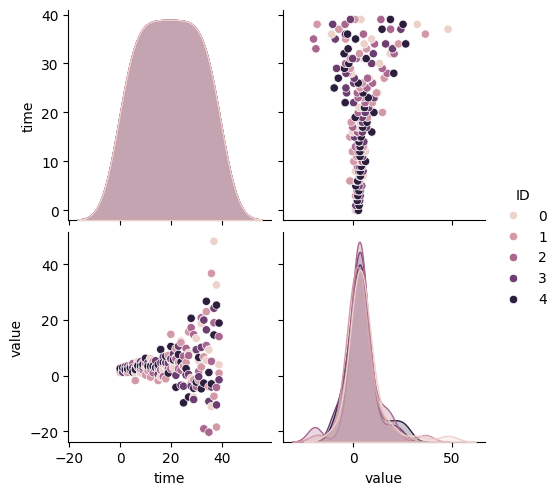

In [143]:
sns.pairplot(myData, hue = 'ID')

If we have a reason to believe that the measurements from one sample are related to those from another, we can make a scatter plot.

In [144]:
oneSample = myData.loc[myData['ID'] == 1] # take the second sample
anotherSample = myData.loc[myData['ID'] == 3] # take the fourth sample
# note that this will fail if your data contains fewer than four samples

In [145]:
print(len(anotherSample.value))
oneSample.head()

40


,ID,time,value
1,1,0,1.110851
6,1,1,2.066676
11,1,2,1.831681
16,1,3,1.079455
21,1,4,2.732943


<Axes: >

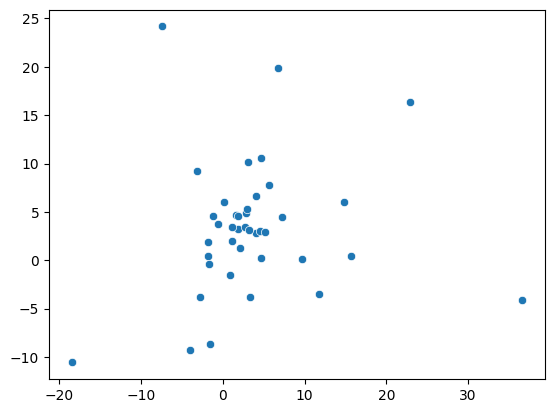

In [146]:
first = oneSample.value.tolist()
second = anotherSample.value.tolist()

sns.scatterplot(x = first, y = second)

## Exploration goals for Session 2

Browse through the documentation of the [`seaborn` library](https://seaborn.pydata.org/index.html) for more options that match your research needs. Generate artificial data so that you can try them out.

## Extra challenge for the particularly brave: animation

Let's get the snapshot for a single timestep to show how the measurements from the samples were distributed.

Text(0.5, 1.0, 'Start time')

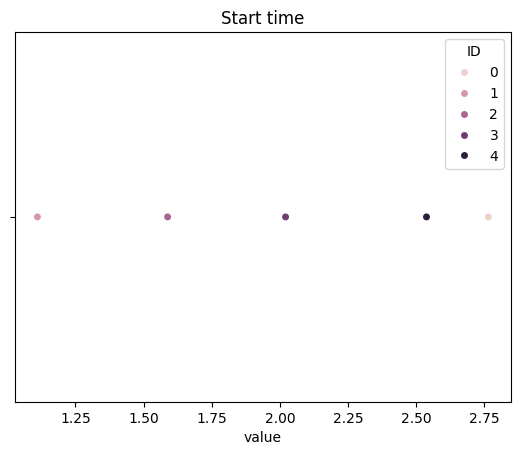

In [147]:
  instant = myData.loc[myData['time'] == 0]
  sns.swarmplot(instant, x = 'value', hue = 'ID').set_title('Start time')

Now, let's allow time to tick forward.

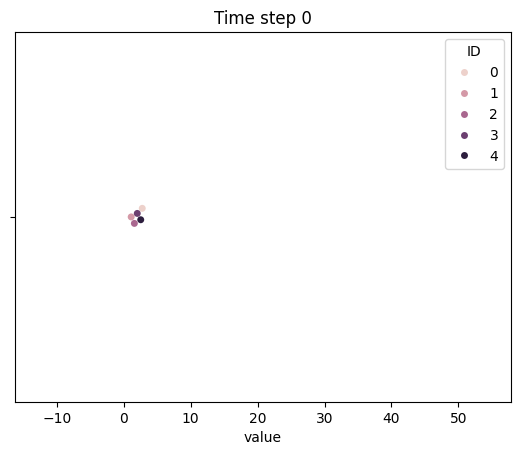

In [148]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('animation', html='jshtml')

import matplotlib.animation as animation

fig, ax = plt.subplots()

low = 0.8 * min(myData.value)
high = 1.2 * max(myData.value)


def step(t): # pick one time step at a time
  ax.cla() # clear the former one
  instant = myData.loc[myData['time'] == t]
  sns.swarmplot(instant, x = 'value', hue = 'ID', ax = ax).set_title(f'Time step {t}')
  ax.set(xlim = (low, high)) # fix the axis so the plot is easier to follow

animation.FuncAnimation(fig, step, frames = range(tl), interval = 200, repeat = True)

What else could you animate to gain insight into the data?